In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# Read in the diamonds dataframe
diamonds = pd.read_csv("./data/diamonds.csv")
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
# Delete the 'Unnamed: 0' column
diamonds = diamonds.drop("Unnamed: 0", axis=1)
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

## Visualize data

In [5]:
# Checking types of data columns
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
# Transform "table" column into int64 type
diamonds['table'] = tf.cast(diamonds['table'], dtype=tf.int64)
diamonds['table'].dtype

dtype('int64')

In [7]:
# Getting numerical columns and categorical columns
num_cols = diamonds.select_dtypes(include=['float64', 'int64']) #[col for col in diamonds.columns if diamonds[col].dtype in ('float64', 'int64')]
cat_cols = diamonds.drop(num_cols, axis=1)

num_cols, cat_cols

(       carat  depth  table  price     x     y     z
 0       0.23   61.5     55    326  3.95  3.98  2.43
 1       0.21   59.8     61    326  3.89  3.84  2.31
 2       0.23   56.9     65    327  4.05  4.07  2.31
 3       0.29   62.4     58    334  4.20  4.23  2.63
 4       0.31   63.3     58    335  4.34  4.35  2.75
 ...      ...    ...    ...    ...   ...   ...   ...
 53935   0.72   60.8     57   2757  5.75  5.76  3.50
 53936   0.72   63.1     55   2757  5.69  5.75  3.61
 53937   0.70   62.8     60   2757  5.66  5.68  3.56
 53938   0.86   61.0     58   2757  6.15  6.12  3.74
 53939   0.75   62.2     55   2757  5.83  5.87  3.64
 
 [53940 rows x 7 columns],
              cut color clarity
 0          Ideal     E     SI2
 1        Premium     E     SI1
 2           Good     E     VS1
 3        Premium     I     VS2
 4           Good     J     SI2
 ...          ...   ...     ...
 53935      Ideal     D     SI1
 53936       Good     D     SI1
 53937  Very Good     D     SI1
 53938    Premi

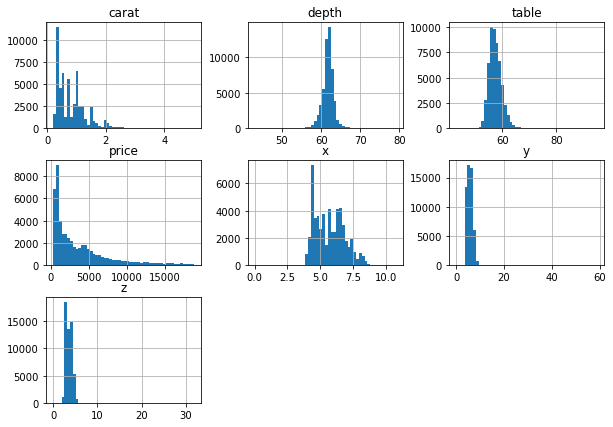

In [8]:
# Visualizing numerical distribution
num_cols.hist(figsize=(10,7), bins=50);

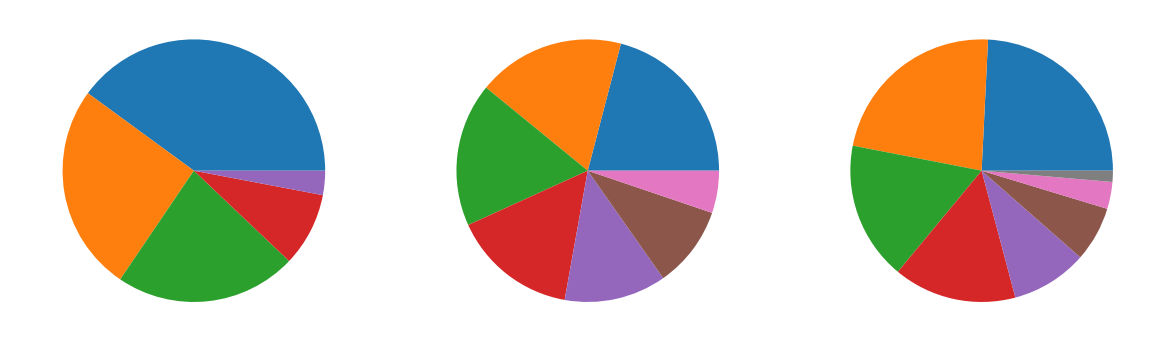

In [100]:
# Visualizing categorical distribution
figure, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,7))


for i, col in enumerate(cat_cols):
    axes[i].pie(cat_cols[col].value_counts().values, labels=cat_cols[col].value_counts().axes[0].tolist(), textprops=dict(color='white'));
plt.show()

## Preprocesing data

- Normalize
- OneHot Encoder

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler